In [9]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import *

from IPython.core.display import HTML

HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

from utils import set_preferences, genConvGIF, symdisp, round_expr

plt.style.use(['science','ieee'])
set_preferences()

plt.rcParams['figure.figsize'] = [4, 3]
plt.rcParams['figure.dpi'] = 150

# Review of random variables and random processes

<h1>Sumário<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Distributions-of-discrete-random-variables" data-toc-modified-id="Distributions-of-discrete-random-variables-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Distributions of discrete random variables</a></span><ul class="toc-item"><li><span><a href="#Bernoulli-distribution" data-toc-modified-id="Bernoulli-distribution-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Bernoulli distribution</a></span></li><li><span><a href="#Binomial-distribution" data-toc-modified-id="Binomial-distribution-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Binomial distribution</a></span></li><li><span><a href="#Uniform-discrete-distribution" data-toc-modified-id="Uniform-discrete-distribution-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Uniform discrete distribution</a></span></li></ul></li><li><span><a href="#Distributions-of-continuous-random-variables" data-toc-modified-id="Distributions-of-continuous-random-variables-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Distributions of continuous random variables</a></span><ul class="toc-item"><li><span><a href="#Uniform-distribution" data-toc-modified-id="Uniform-distribution-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Uniform distribution</a></span></li><li><span><a href="#Laplace-distribution" data-toc-modified-id="Laplace-distribution-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Laplace distribution</a></span></li><li><span><a href="#Gaussian-distribution" data-toc-modified-id="Gaussian-distribution-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Gaussian distribution</a></span></li></ul></li><li><span><a href="#Calculating-probabilities" data-toc-modified-id="Calculating-probabilities-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Calculating probabilities</a></span></li></ul></div>

### Random Variable

A random variable $X$ is a function that assigns a numerical value to each outcome in a sample space of a random experiment. Random variables can be classified into two main types:

1. **Discrete Random Variable**: A random variable that takes on a finite or countably infinite set of possible values. Examples include the number of heads in a series of coin flips or the outcome of rolling a die.

2. **Continuous Random Variable**: A random variable that takes on values in a continuous range. Examples include the time it takes for an event to occur or the exact height of individuals.

Mathematically, if $S$ is the sample space of an experiment and $X$ is a random variable, then $X: S \to \mathbb{R}$ is a function that maps outcomes $s \in S$ to real numbers $X(s)$.

Random variables are typically described by their probability distributions, which can be represented by:
- **Probability Mass Function (PMF)** for discrete random variables.
- **Probability Density Function (PDF)** for continuous random variables.
- **Cumulative Distribution Function (CDF)** for both types.

### Cumulative distribution function

The cumulative distribution function (CDF) of a random variable $X$ is a function $F_X(x)$ that gives the probability that $X$ takes a value less than or equal to $x$. For any value $x$, the CDF is defined as:

$$
F_X(x) = P(X \leq x)
$$

The CDF has the following properties:
1. The CDF is a non-decreasing function: if $x_1 \leq x_2$, then $F_X(x_1) \leq F_X(x_2)$.
2. The CDF is right-continuous.
3. As $x$ approaches negative infinity, $F_X(x)$ approaches 0:
   $$
   \lim_{x \to -\infty} F_X(x) = 0
   $$
4. As $x$ approaches positive infinity, $F_X(x)$ approaches 1:
   $$
   \lim_{x \to \infty} F_X(x) = 1
   $$
5. For a continuous random variable, the CDF is related to the probability density function (PDF) $f_X(x)$ by:
   $$
   F_X(x) = \int_{-\infty}^{x} f_X(t) \, dt
   $$
6. For a discrete random variable, the CDF is the sum of the probabilities for all outcomes less than or equal to $x$.

The CDF provides a complete description of the distribution of a random variable, allowing us to calculate probabilities for intervals and to understand the distribution's shape and spread.


### Probability mass function

The probability mass function (PMF) of a discrete random variable $X$ is a function $f_X(x)$ that gives the probability that $X$ takes a specific value $x$. For any value $x$, the PMF is defined as:

$$
f_X(x) = P(X = x)
$$

The PMF must satisfy the following properties:
1. $f_X(x) \geq 0$ for all $x$.
2. The sum of the PMF over all possible values of $X$ is equal to 1:
   $$
   \sum_{x \in \text{support of } X} f_X(x) = 1
   $$
3. For any specific value $x_i$ in the support of $X$, $f_X(x_i)$ gives the probability that $X$ is exactly equal to $x_i$:
   $$
   P(X = x_i) = f_X(x_i)
   $$

The PMF is used to describe the distribution of a discrete random variable and allows us to calculate the probability of specific outcomes and to understand the likelihood of different events.

### Probability density function

The probability density function (PDF) of a continuous random variable $X$ is a function $f_X(x)$ that describes the likelihood of $X$ taking a specific value. For any value $x$, $f_X(x)$ represents the relative likelihood that $X$ takes on that value.

The PDF must satisfy the following properties:
1. $f_X(x) \geq 0$ for all $x$.
2. The total area under the curve of $f_X(x)$ over all possible values of $X$ is equal to 1:
   $$
   \int_{-\infty}^{\infty} f_X(x) \, dx = 1
   $$
3. The probability that $X$ falls within a certain interval $[a, b]$ is given by the integral of $f_X(x)$ over that interval:
   $$
   P(a \leq X \leq b) = \int_{a}^{b} f_X(x) \, dx
   $$

Unlike discrete random variables, the PDF does not give the probability of $X$ taking a specific value, but rather the density of the probability around that value.

## Distributions of discrete random variables

### Bernoulli distribution

Let $X$ be a discrete random variable (r.v.) with a Bernoulli distribution with probability $p$, which we denote as $X \sim \mathrm{Bernoulli(p)}$, the probability mass function of $X$ is given by

$$ f_X(X=k) = (1-p)\delta(k)+p\delta(k-1)$$

with $k \in\{0, 1\}, 0 \leq p \leq 1$.

In [55]:
# distribution parameters
p = 0.25

X = bernoulli(p) # defines a discrete r.v. X with a Bernoulli distribution

x = np.arange(-3, 5)

pmf = X.pmf(x) # probability mass function of X
cdf = X.cdf(x) # cumulative distribution function of X

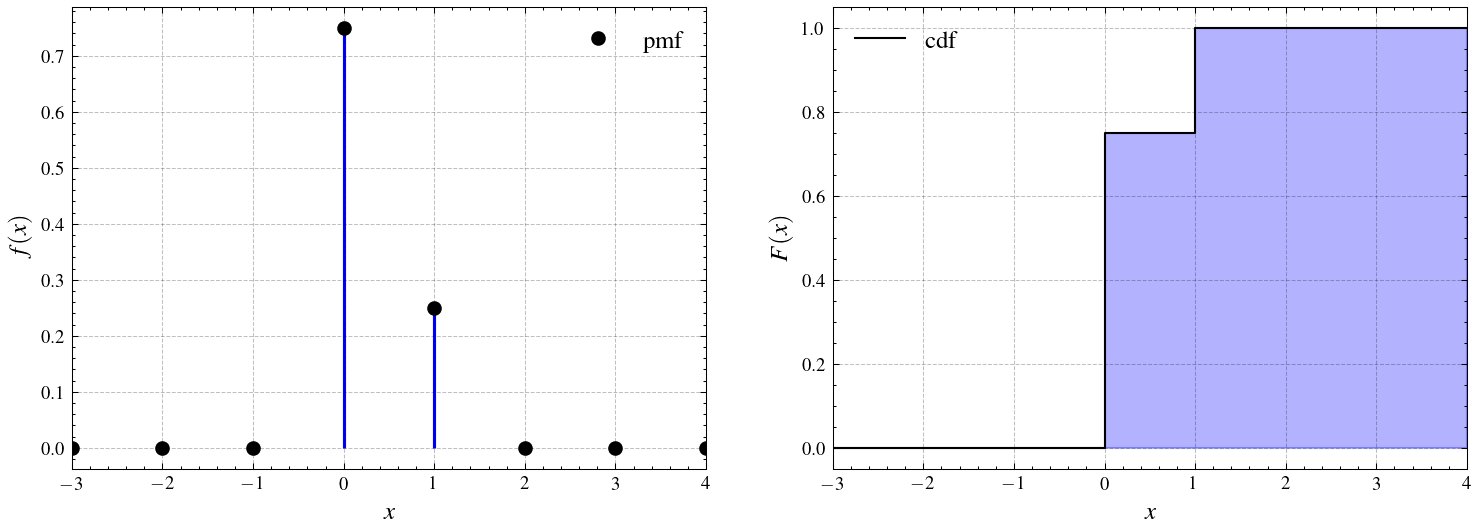

In [63]:
# plot pdf and cdf of X
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,4))
ax1.vlines(x, 0, X.pmf(x), colors='b', lw=1.5, alpha=1)
ax1.plot(x, pmf,'o', markersize = 6, label = 'pmf');
ax1.grid()
ax1.legend()
ax1.set_xlabel('$x$')
ax1.set_ylabel('$f(x)$');
ax1.set_xlim(min(x), max(x));

ax2.step(x, cdf, linewidth =1, where="post", label = 'cdf');
ax2.fill_between(x, cdf, step="post", color='blue', alpha=0.3)
ax2.grid()
ax2.legend()
ax2.set_xlabel('$x$')
ax2.set_ylabel('$F(x)$');
ax2.set_xlim(min(x), max(x));

In [13]:
numVal = 200  # number of realizations to be generated from the r.v. X

X_vals = X.rvs(size=numVal)

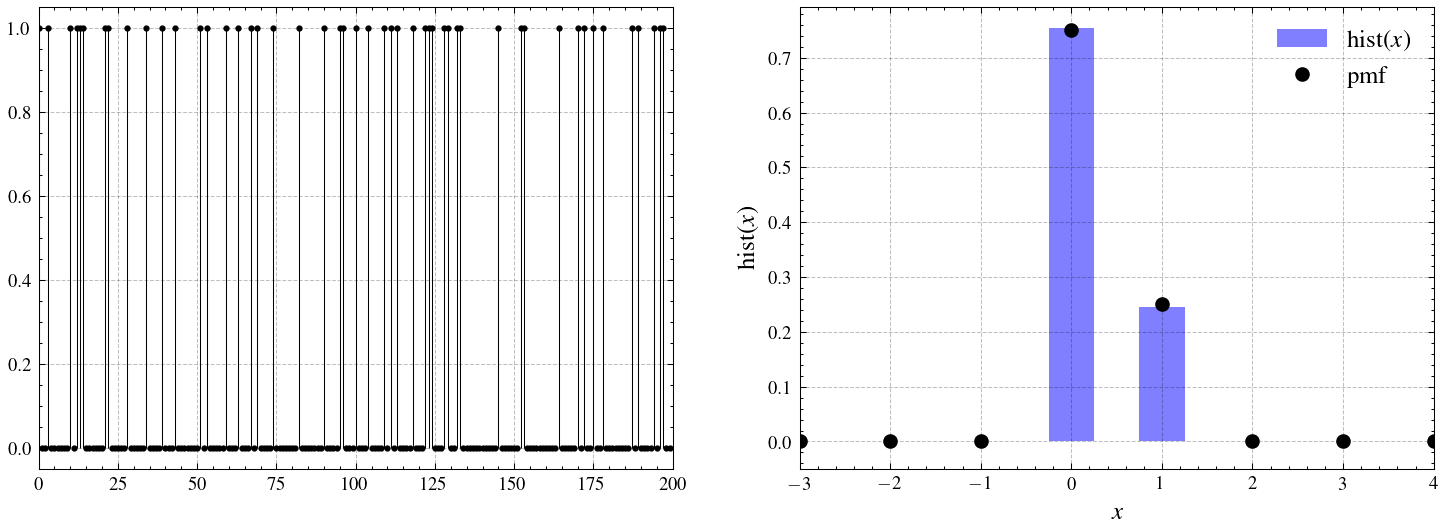

In [22]:
# plot values and histogram
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,4))
ax1.stem(X_vals, basefmt=" ");
ax1.grid()
ax1.set_xlim(0,numVal);

ax2.hist(X_vals, density=True, color='b', bins=np.arange(min(x)+0.5, max(x)+0.5), rwidth = 0.5, label = 'hist($x$)',alpha=0.3);
ax2.plot(x, pmf, 'ko', markersize=6, label = 'pmf', linewidth=2);
ax2.grid()
ax2.legend()
ax2.set_xlabel('$x$')
ax2.set_ylabel('hist($x$)');
ax2.set_xlim(min(x), max(x));
ax2.set_ylim(-0.05,);

### Binomial distribution

Let $X$ be a discrete r.v. with a binomial distribution with parameters $(n, p)$, i.e., $X \sim \mathrm{binomial(n,p)}$, the probability mass function of $X$ is given by

$$ f_X(X=k) =\left(\begin{array}{l}n \\k \end{array}\right) p^{k}(1-p)^{n-k}$$

with $ k \in\{0,1, \ldots, n\}, 0 \leq p \leq 1$.

In [64]:
# parâmetros da distribuição
p  = 0.25
n  = 10 

X = binom(n, p) # define uma v.a. discreta X de distribuição binomial

x   = np.arange(-2, 11)

pmf = X.pmf(x) # função de massa de probabilidade de X
cdf = X.cdf(x) # Função distribuição acumulada de X

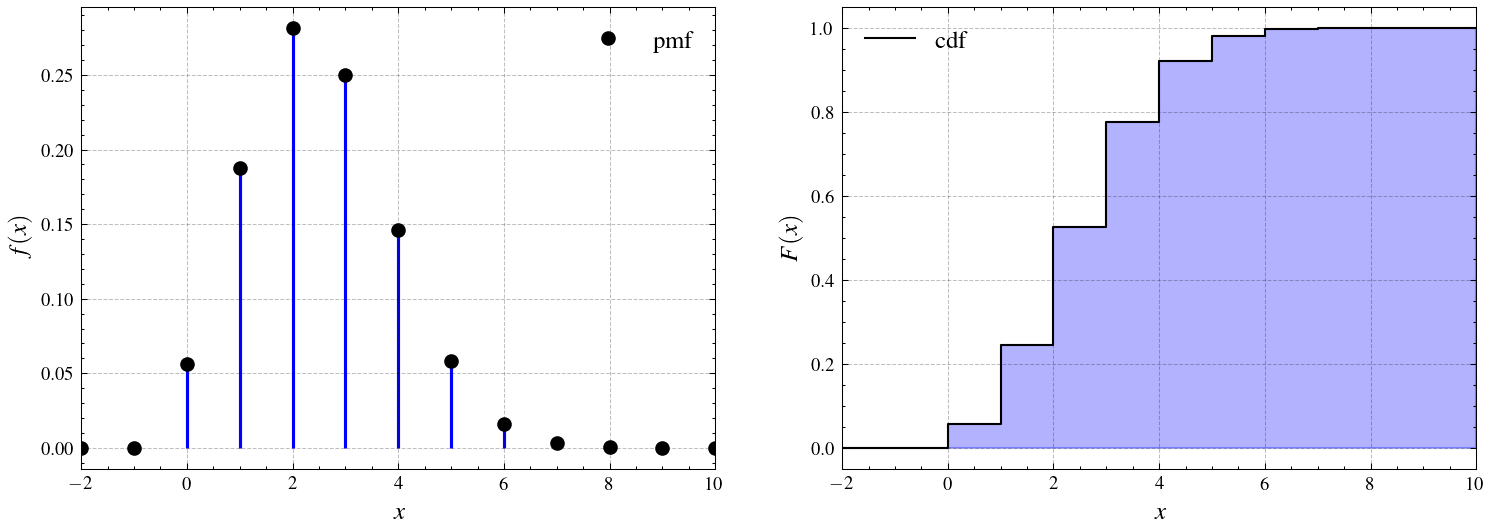

In [65]:
# plota fdp e fda da v.a. X
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,4))
ax1.vlines(x, 0, X.pmf(x), colors='b', lw=1.5, alpha=1)
ax1.plot(x, pmf,'o', markersize = 6, label = 'pmf');
ax1.grid()
ax1.legend()
ax1.set_xlabel('$x$')
ax1.set_ylabel('$f(x)$');
ax1.set_xlim(min(x), max(x));

ax2.step(x, cdf, linewidth =1, where="post", label = 'cdf');
ax2.fill_between(x, cdf, step="post", color='blue', alpha=0.3)
ax2.grid()
ax2.legend()
ax2.set_xlabel('$x$')
ax2.set_ylabel('$F(x)$');
ax2.set_xlim(min(x), max(x));

In [27]:
numVal = 100  # número de realizações a serem geradas da v.a. X

X_vals = X.rvs(size=numVal)

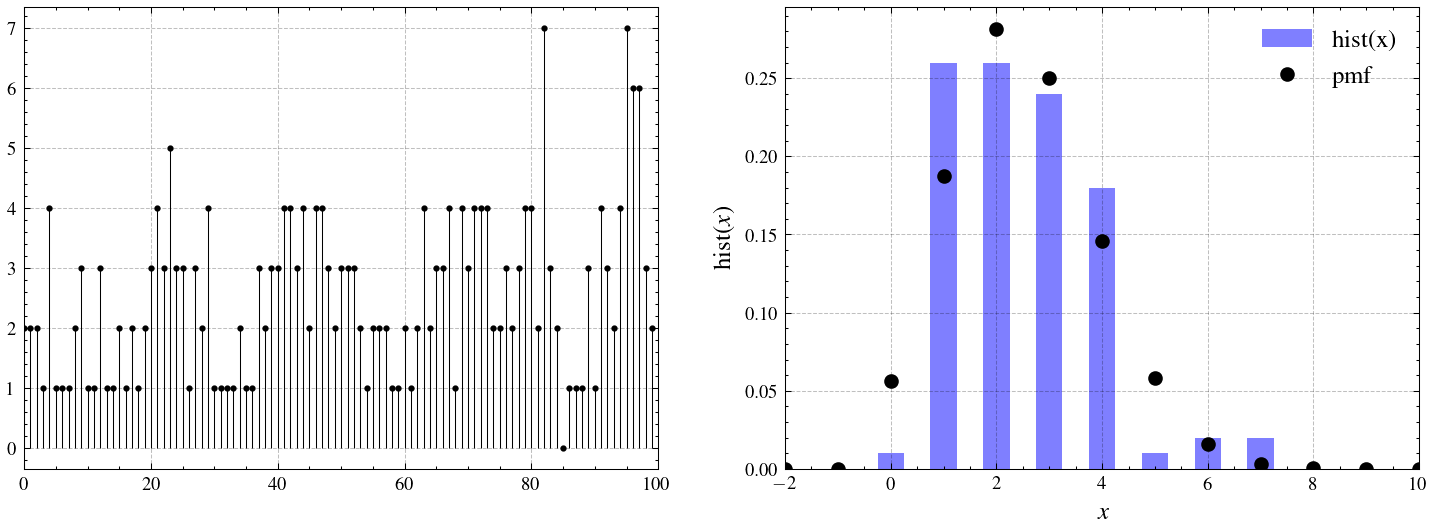

In [30]:
# plota valores e histograma
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,4))
ax1.stem(X_vals, basefmt=" ");
ax1.grid()
ax1.set_xlim(0,numVal);

ax2.hist(X_vals, density=True, color='blue', bins=np.arange(min(x)-0.5, max(x)+0.5), rwidth = 0.5, label = 'hist(x)',alpha=0.3);
ax2.plot(x, pmf, 'ko', markersize =6, label = 'pmf', linewidth=2);
ax2.grid()
ax2.legend()
ax2.set_xlabel('$x$')
ax2.set_ylabel('hist($x$)');
ax2.set_xlim(min(x), max(x));

### Uniform discrete distribution

Let $X$ be a discrete r.v. with a uniform distribution over the set $\mathcal{X} = \{x_0, x_0+1, x_0+2, \ldots, x_0 + (n-1)\}$ of cardnality $n$, i.e., $X \sim \mathrm{uniform}(x \in \mathcal{X})$, the probability mass function of $X$ is given by

$$ f_X(X=k) = \frac{1}{n} $$

with $ k \in \mathcal{X}$.

In [129]:
# distribution support
xi = -2
xf = 3

X = randint(xi, xf)

x = np.arange(-7, 8)

pmf = X.pmf(x) # probability mass function of X
cdf = X.cdf(x) # cumulative distribution function of X

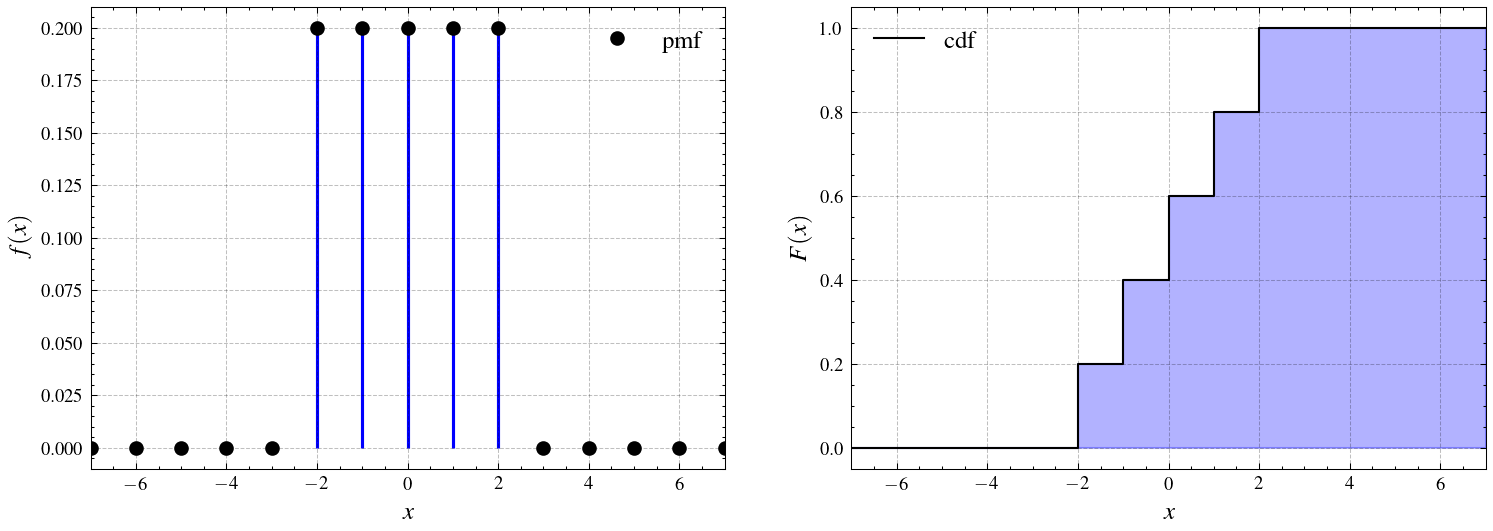

In [130]:
# plota fdp e fda da v.a. X
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,4))
ax1.vlines(x, 0, X.pmf(x), colors='b', lw=1.5, alpha=1)
ax1.plot(x, pmf,'o', markersize = 6, label = 'pmf');
ax1.grid()
ax1.legend()
ax1.set_xlabel('$x$')
ax1.set_ylabel('$f(x)$');
ax1.set_xlim(min(x), max(x));

ax2.step(x, cdf, linewidth =1, where="post", label = 'cdf');
ax2.fill_between(x, cdf, step="post", color='blue', alpha=0.3)
ax2.grid()
ax2.legend()
ax2.set_xlabel('$x$')
ax2.set_ylabel('$F(x)$');
ax2.set_xlim(min(x), max(x));

## Distributions of continuous random variables

### Uniform distribution

Let $X$ be a continuous r.v. with a uniform distribution over the interval $(x_0, x_0+\Delta)$, i.e., $X \sim \mathrm{uniform(x_0, x_0+\Delta)}$, the probability density function of $X$ is given by

$$
f_X(x)=\left\{\begin{array}{ll}
\frac{1}{\Delta} & \text { for } x_0 \leq x \leq x_0+\Delta, \\
0 & \text { for } x<x_0 \text { or } x>x_0+\Delta
\end{array}\right.
$$


In [66]:
# distribution parameters
x0 = 1
Δ = 4

X = uniform(loc=x0, scale=Δ) # defines a uniform r.v. X in the interval (x0, x0+Δ)

x = np.arange(x0-Δ/2, x0+3*Δ/2, 0.01)

pdf = X.pdf(x) # probability density function of X
cdf = X.cdf(x) # cumulative distribution function of X

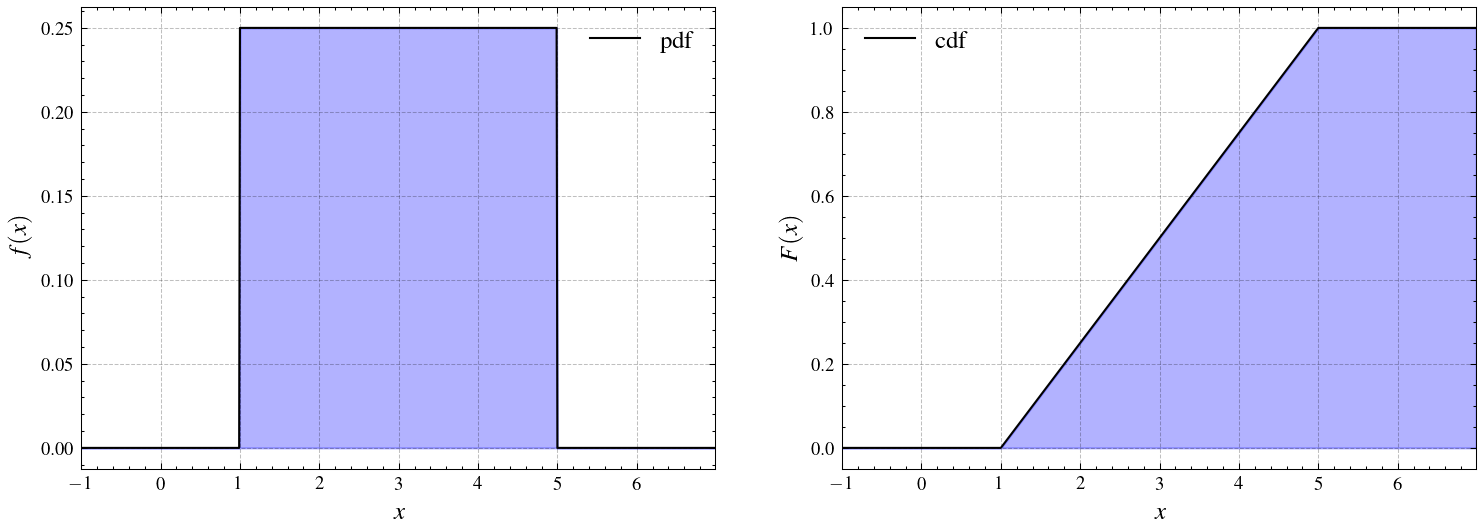

In [67]:
# plota fdp e fda da v.a. X
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,4))
ax1.plot(x, pdf, linewidth =1, label = 'pdf');
ax1.fill_between(x, pdf, color='blue', alpha=0.3)
ax1.grid()
ax1.legend()
ax1.set_xlabel('$x$')
ax1.set_ylabel('$f(x)$');
ax1.set_xlim(min(x), max(x));

ax2.plot(x, cdf, linewidth =1, label = 'cdf');
ax2.fill_between(x, cdf, color='blue', alpha=0.3)
ax2.grid()
ax2.legend()
ax2.set_xlabel('$x$')
ax2.set_ylabel('$F(x)$');
ax2.set_xlim(min(x), max(x));

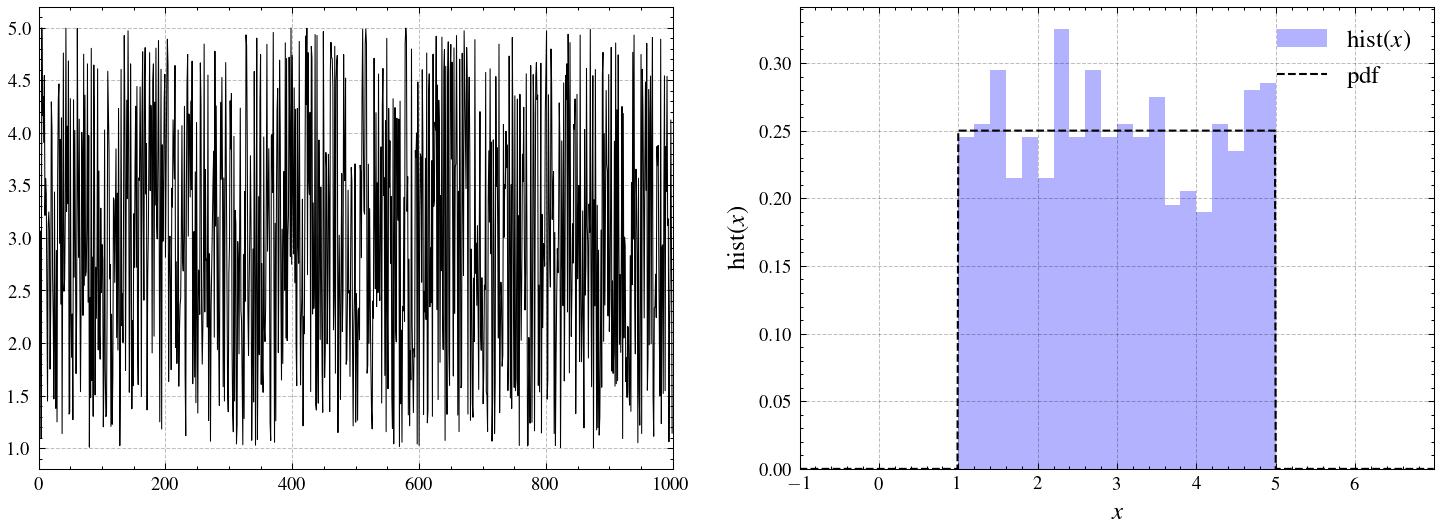

In [69]:
numVal = 1000  # número de realizações a serem geradas da v.a. X

X_vals = X.rvs(size=numVal)

# plota valores e histograma
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,4))
ax1.plot(X_vals);
ax1.grid()
ax1.set_xlim(0,numVal);

ax2.hist(X_vals, color='blue', density=True, bins=20, label = 'hist($x$)',alpha=0.3);
ax2.plot(x, pdf, 'k--', label = 'pdf', linewidth=1);
ax2.grid()
ax2.legend(loc='upper right')
ax2.set_xlabel('$x$')
ax2.set_ylabel('hist($x$)');
ax2.set_xlim(min(x), max(x));

### Laplace distribution

Let $X$ be an r.v. with a Laplace distribution with parameters $(\mu, b)$, i.e., $X \sim \mathrm{Laplace(\mu, b)}$, the probability density function of $X$ is given by

$$
f_X(x)=\frac{1}{2b} \exp\left(-\frac{|x-\mu|}{b}\right)
$$

for $-\infty < x < \infty$.

In [70]:
# distribution parameters
μ = 1
b = 0.5

X = laplace(loc=μ, scale=b) # defines a Laplace r.v. X with mean μ and scale parameter b

x = np.arange(-8*b+μ, 8*b+μ, 0.01)

pdf = X.pdf(x) # probability density function of X
cdf = X.cdf(x) # cumulative distribution function of X

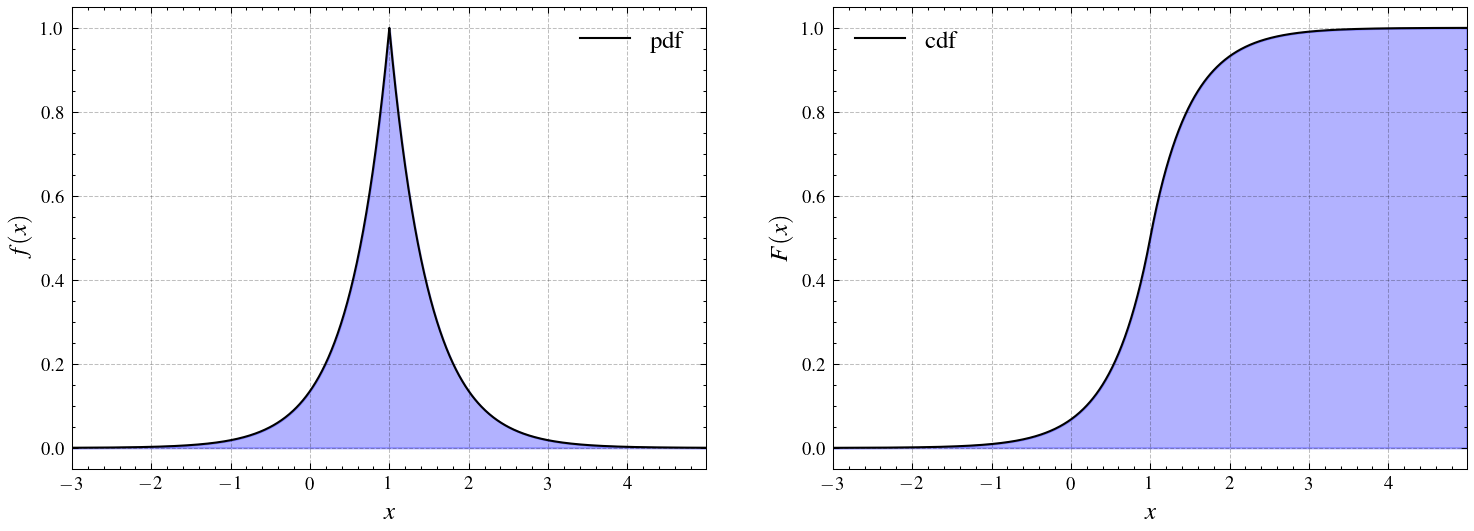

In [71]:
# plota fdp e fda da v.a. X
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,4))
ax1.plot(x, pdf, linewidth = 1, label = 'pdf');
ax1.fill_between(x, pdf, color='blue', alpha=0.3)
ax1.grid()
ax1.legend()
ax1.set_xlabel('$x$')
ax1.set_ylabel('$f(x)$');
ax1.set_xlim(min(x), max(x));

ax2.plot(x, cdf, linewidth = 1, label = 'cdf');
ax2.fill_between(x, cdf, color='blue', alpha=0.3)
ax2.grid()
ax2.legend()
ax2.set_xlabel('$x$')
ax2.set_ylabel('$F(x)$');
ax2.set_xlim(min(x), max(x));

In [72]:
numVal = 1000 # número de realizações a serem geradas da v.a. X

X_vals = X.rvs(size=numVal)

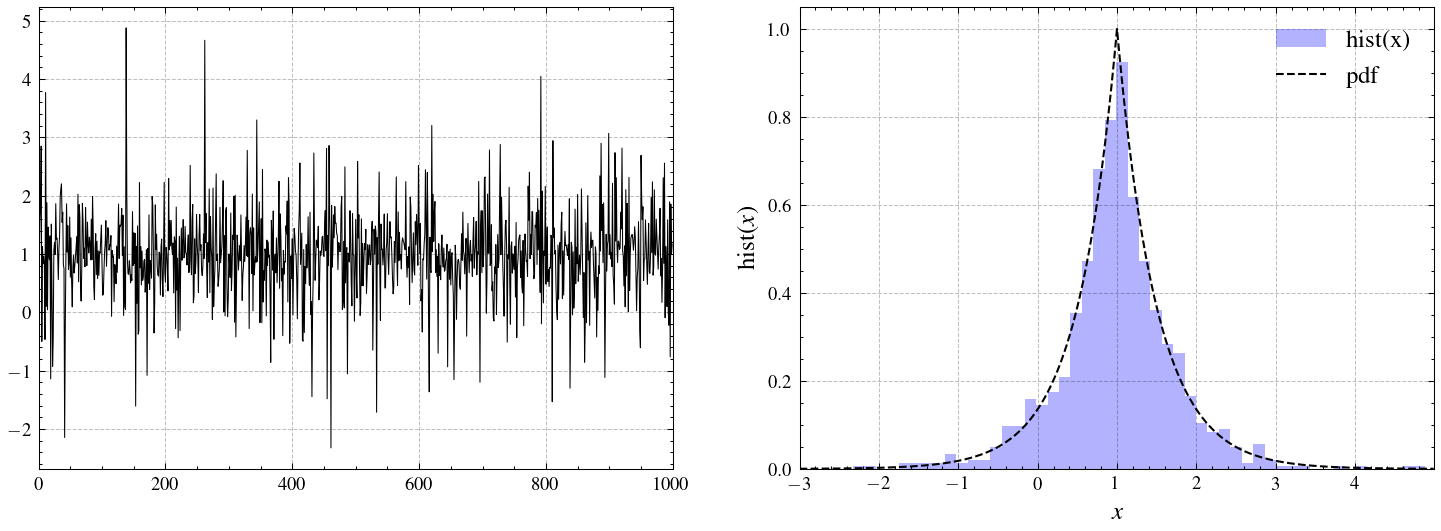

In [73]:
# plot values and histogram
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,4))
ax1.plot(X_vals);
ax1.grid()
ax1.set_xlim(0,numVal);

ax2.hist(X_vals, color= 'blue', density=True, bins=50, label = 'hist(x)',alpha=0.3);
ax2.plot(x, pdf, 'k--', label = 'pdf', linewidth=1);
ax2.grid()
ax2.legend()
ax2.set_xlabel('$x$')
ax2.set_ylabel('hist($x$)');
ax2.set_xlim(min(x), max(x));

### Gaussian distribution

Let $X$ be a continuous r.v. with a normal (Gaussian) distribution with parameters $(\mu, \sigma^2)$, i.e., $X \sim \mathcal{N}(\mu, \sigma^2)$, the probability density function of $X$ is given by

$$
f_X\left(x\right)=\frac{1}{\sqrt{2 \pi \sigma^{2}}} e^{-\frac{(x-\mu)^{2}}{2 \sigma^{2}}}
$$

for $-\infty < x < \infty$.


In [84]:
# distribution parameters
μ = 0.37
σ = 0.5

X = norm(loc=μ, scale=σ) # defines a Gaussian r.v. X with mean μ and standard deviation σ

x = np.arange(-5+μ, 5+μ, 0.01)

pdf = X.pdf(x) # probability density function of X
cdf = X.cdf(x) # cumulative distribution function of X

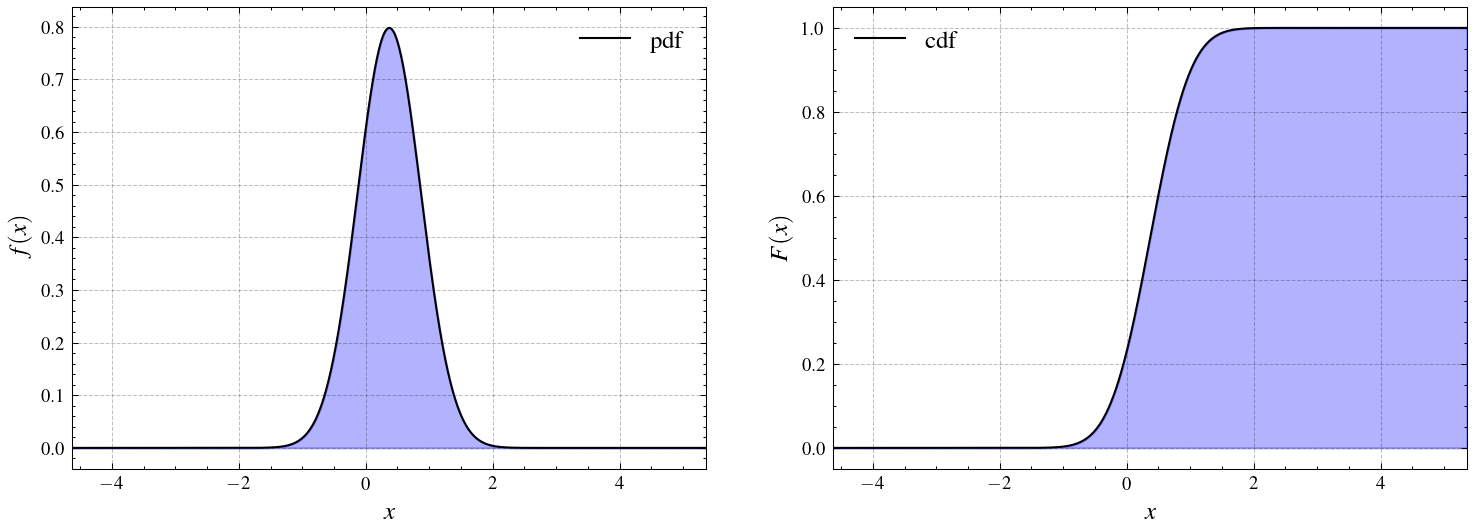

In [85]:
# plota fdp e fda da v.a. X
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,4))
ax1.plot(x, pdf, linewidth=1, label = 'pdf');
ax1.fill_between(x, pdf, color='blue', alpha=0.3)
ax1.grid()
ax1.legend()
ax1.set_xlabel('$x$')
ax1.set_ylabel('$f(x)$');
ax1.set_xlim(min(x), max(x));

ax2.plot(x, cdf, linewidth=1, label = 'cdf');
ax2.fill_between(x, cdf, color='blue', alpha=0.3)
ax2.grid()
ax2.legend()
ax2.set_xlabel('$x$')
ax2.set_ylabel('$F(x)$');
ax2.set_xlim(min(x), max(x));

In [77]:
numVal = 1000  # número de realizações a serem geradas da v.a. X

X_vals = X.rvs(size=numVal)

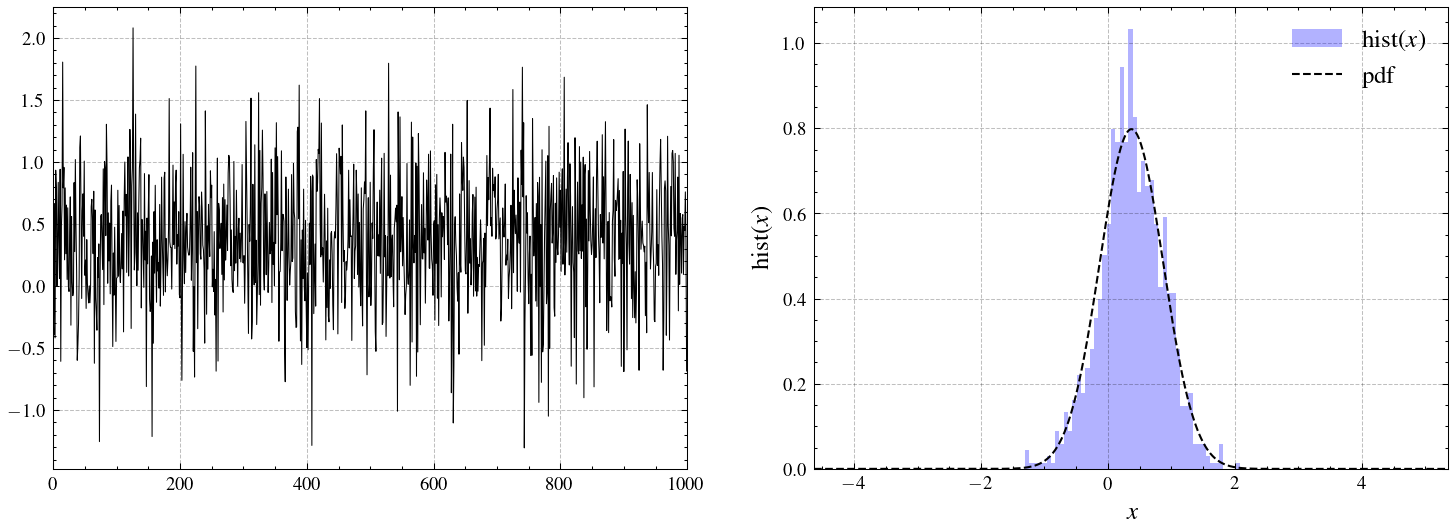

In [81]:
# plot values and histogram
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,4))
ax1.plot(X_vals);
ax1.grid()
ax1.set_xlim(0,numVal);

ax2.hist(X_vals, density=True, color='blue', bins=50, label = 'hist($x$)',alpha=0.3);
ax2.plot(x, pdf, 'k--', label = 'pdf', linewidth=1);
ax2.grid()
ax2.legend()
ax2.set_xlabel('$x$')
ax2.set_ylabel('hist($x$)');
ax2.set_xlim(min(x), max(x));

### Multivariate Gaussian distribution

Let $\mathbf{X} = [X_1, X_2, \dots, X_n]^\top$ be a multivariate random vector with a Gaussian (normal) distribution characterized by a mean vector $\boldsymbol{\mu} = [\mu_1, \mu_2, \dots, \mu_n]^\top$ and a covariance matrix $\boldsymbol{\Sigma}$, i.e., $\mathbf{X} \sim \mathcal{N}(\boldsymbol{\mu}, \boldsymbol{\Sigma})$. The probability density function of $\mathbf{X}$ is given by

$$
f_{\mathbf{X}}(\mathbf{x}) = \frac{1}{(2\pi)^{n/2} \sqrt{|\boldsymbol{\Sigma}|}} \exp\left(-\frac{1}{2} (\mathbf{x} - \boldsymbol{\mu})^\top \boldsymbol{\Sigma}^{-1} (\mathbf{x} - \boldsymbol{\mu})\right)
$$

where $\mathbf{x} = [x_1, x_2, \dots, x_n]^\top$ is a realization of $\mathbf{X}$, $\boldsymbol{\mu}$ is the mean vector, $\boldsymbol{\Sigma}$ is the covariance matrix, and $|\boldsymbol{\Sigma}|$ is the determinant of $\boldsymbol{\Sigma}$. The multivariate Gaussian distribution is defined for $-\infty < x_i < \infty$ for each $i = 1, 2, \dots, n$.


## Calculating probabilities

$$\large P(a<X<b)=\int_a^b f_X(x)dx = F_X(b)-F_X(a)$$

In [21]:
def prob(X, a, b):
    '''
    calcula a probabilidade da v.a. X assumir valores 
    no intervalo [a, b].
    '''
    return X.cdf(b)-X.cdf(a)

In [22]:
prob(X, μ-2*σ, μ+2*σ)

0.9544997361036416

In [23]:
np.mean(X_vals)

0.36196291444486256

In [24]:
np.sqrt(np.var(X_vals))

0.4975765050498015

## Statistical averages 

#### Expected Value (Mean)

The **expected value** or **mean** of a random variable $X$ is a measure of the central tendency of its distribution. For a discrete random variable $X$ with probability mass function $f_X(x)$, the expected value is defined as:
$$
\mathbb{E}[X] = \sum_{x} x f_X(x)
$$

For a continuous random variable $X$ with probability density function $f_X(x)$, the expected value is defined as:
$$
\mathbb{E}[X] = \int_{-\infty}^{\infty} x f_X(x) \, dx
$$

#### Variance

The **variance** of a random variable $X$ measures the spread of its values around the mean. It is defined as the expected value of the squared deviation from the mean:
$$
\sigma_X^2 = \mathbb{E}[(X - \mathbb{E}[X])^2]
$$

For a discrete random variable:
$$
\sigma_X^2 = \sum_{x} (x - \mathbb{E}[X])^2 f_X(x)
$$

For a continuous random variable:
$$
\sigma_X^2 = \int_{-\infty}^{\infty} (x - \mathbb{E}[X])^2 f_X(x) \, dx
$$

#### Standard Deviation

The **standard deviation** is the square root of the variance and provides a measure of the spread of a distribution in the same units as the random variable:
$$
\sigma_X = \sqrt{\sigma_X^2}
$$

#### Covariance

The **covariance** between two random variables $X$ and $Y$ measures the degree to which they vary together. It is defined as:
$$
\text{Cov}(X, Y) = \mathbb{E}[(X - \mathbb{E}[X])(Y - \mathbb{E}[Y])]
$$

For discrete random variables:
$$
\text{Cov}(X, Y) = \sum_{x} \sum_{y} (x - \mathbb{E}[X])(y - \mathbb{E}[Y]) f_{X,Y}(x, y)
$$

For continuous random variables:
$$
\text{Cov}(X, Y) = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} (x - \mathbb{E}[X])(y - \mathbb{E}[Y]) f_{X,Y}(x, y) \, dx \, dy
$$

#### Correlation Coefficient

The **correlation coefficient** $\rho_{X,Y}$ between two random variables $X$ and $Y$ is a normalized measure of their linear relationship, defined as:
$$
\rho_{X,Y} = \frac{\text{Cov}(X, Y)}{\sigma_X \sigma_Y}
$$

The correlation coefficient ranges from $-1$ to $1$, where:
- $\rho_{X,Y} = 1$ indicates perfect positive linear correlation.
- $\rho_{X,Y} = -1$ indicates perfect negative linear correlation.
- $\rho_{X,Y} = 0$ indicates no linear correlation.

## Stochastic processes

A stochastic process is a collection of random variables indexed by time or space, representing the evolution of a system over time or across spatial dimensions. Formally, a stochastic process is defined as:

$$
\{ X(t) : t \in T \}
$$

where:
- $T$ is the index set, which could represent time (discrete or continuous) or space.
- $X(t)$ is a random variable representing the state of the process at time $t$.

Stochastic processes can be classified into several types based on the nature of the index set and the state space:

1. **Discrete-Time Stochastic Process**: The index set $T$ is discrete, such as $T = \{0, 1, 2, \dots\}$. Examples include Markov chains and random walks.

2. **Continuous-Time Stochastic Process**: The index set $T$ is continuous, such as $T = [0, \infty)$. Examples include the Wiener process (Brownian motion) and Poisson processes.

3. **Discrete-State Stochastic Process**: The state space of the process is discrete. An example is a Markov chain where the system transitions between a finite number of states.

4. **Continuous-State Stochastic Process**: The state space of the process is continuous. An example is the Wiener process, where the state can take any value in a continuous range.

Key concepts related to stochastic processes include stationarity and ergodicity.

### Stationarity

**Stationarity** is a property of a stochastic process that indicates that its statistical characteristics are invariant over time. There are different types of stationarity:

1. **Strict Stationarity (Strong Stationarity)**:  
   A stochastic process $\{X(t) : t \in T\}$ is said to be strictly stationary if the joint distribution of any set of time points is identical regardless of how those time points are shifted. Formally, for any collection of time points $t_1, t_2, \dots, t_n$ and any time shift $h$, the following condition holds:
   $$
   (X(t_1), X(t_2), \dots, X(t_n)) \overset{d}{=} (X(t_1+h), X(t_2+h), \dots, X(t_n+h))
   $$
   where $\overset{d}{=}$ denotes equality in distribution. Strict stationarity implies that all moments of the process are invariant under time shifts.

2. **Weak Stationarity (Wide-Sense Stationarity or Second-Order Stationarity)**:  
   A stochastic process is weakly stationary if it satisfies the following conditions:
   - The mean $\mathbb{E}[X(t)]$ is constant for all $t \in T$.
   - The variance $\text{Var}(X(t))$ is finite and constant for all $t \in T$.
   - The autocovariance function $\text{Cov}(X(t), X(t+h))$ depends only on the time difference $h$, not on the specific time $t$.

   Mathematically:
   $$
   \mathbb{E}[X(t)] = \mu \quad \forall t
   $$
   $$
   \text{Cov}(X(t), X(t+h)) = \text{Cov}(X(0), X(h)) \quad \forall t, h
   $$
   
   Weak stationarity is less restrictive than strict stationarity and is often used in the analysis of time series data.

### Ergodicity

**Ergodicity** refers to the relationship between time averages and ensemble averages in a stochastic process. For an ergodic process, the statistical properties calculated over a single realization (or sample path) are equivalent to those calculated across an ensemble of different realizations. There are different forms of ergodicity, depending on the characteristics being considered:

1. **Mean Ergodicity**:  
   A stochastic process is mean ergodic if the time average of the process converges to the ensemble mean as the observation time increases. Formally, the time average of $X(t)$ over a long period $T$ should equal the expected value of $X(t)$:
   $$
   \lim_{T \to \infty} \frac{1}{T} \int_0^T X(t) \, dt = \mathbb{E}[X(t)]
   $$
   Mean ergodicity implies that the mean of the process can be estimated from a single, long realization.

2. **Autocovariance Ergodicity**:  
   A stochastic process is autocovariance ergodic if the time average of the autocovariance function (over a single realization) converges to the ensemble average of the autocovariance function:
   $$
   \lim_{T \to \infty} \frac{1}{T} \int_0^T (X(t) - \mu)(X(t+h) - \mu) \, dt = \mathbb{E}[(X(t) - \mu)(X(t+h) - \mu)]
   $$

3. **Ergodicity in Distribution**:  
   A stochastic process is ergodic in distribution if the distribution of the time averages of the process converges to the distribution of the process itself as the observation time increases. This implies that the entire distribution of the process can be inferred from a single realization.

**Implications of Ergodicity**:  
- For an ergodic process, statistical inferences made from a single time series (assuming the series is sufficiently long) are representative of the entire process.
- In practice, ergodicity is often assumed in time series analysis to justify the use of time averages in estimating statistical properties.

Stationarity and ergodicity are fundamental concepts in time series analysis, signal processing, and various fields that model and analyze temporal data.
